


<h2 align=center style="line-height:500%;font-family:vazir;color:#0099cc">
<font  color="#0099cc">
Problem 2: Hierarchical clustering</font>
</h2>


<h2 align=left style="line-height:200%;font-family:vazir;color:#0099cc">
<font  color="#0099cc">
Part 1
</font>
</h2>


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
ابتدا تنها با در نظر گرفتن دو ویژگی‌ <code>market cap</code> و <code>volume</code>، الگوریتم خوشه‌بندی سلسله‌مراتبی را اجرا کرده و دندوگرام (Dendrogram) به‌دست‌آمده را نمایش دهید. با توجه به نتیجه‌ی حاصل‌شده، چنان‌چه بخواهیم این ۲۰ رمزارز را به ۲ خوشه‌ی مجزا تقسیم کنیم، این دو خوشه را مشخص کنید و سعی کنید برای نتایج حاصل را تحلیل و تفسیر کنید.
</font>
</p>


Prepping the data:

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder


coin_data = pd.read_excel(r'D:\Sharif University of Tech\Data Sience Boot Camp\Project\Second Phaze\Part_2\Data\coins_data.xlsx')

features = coin_data[['MarketCap', 'Volume']]
coin_names = coin_data['Symbol']

scaler = StandardScaler()
features = scaler.fit_transform(features)

Performing hierarchical clustering and the dendogram:

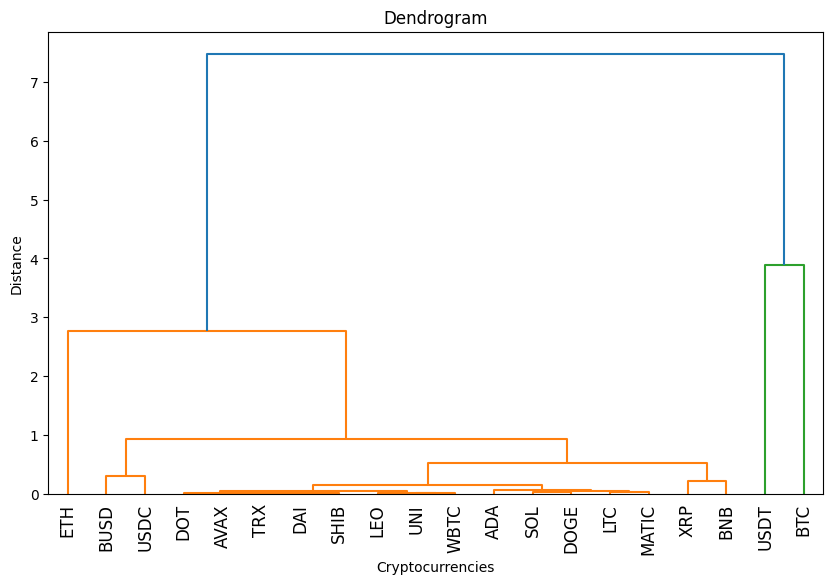

In [112]:
from scipy.cluster.hierarchy import dendrogram, linkage
from plotly.offline import iplot
import plotly.figure_factory as ff


Z = sch.linkage(features, method='ward')
plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(Z, labels=coin_names.tolist(), orientation='top')

plt.title('Dendrogram')
plt.xlabel('Cryptocurrencies')
plt.ylabel('Distance')
plt.xticks(rotation=90)
plt.show()

Ok so the dendogram graph is shown above, but what does it mean ?


the dendogram is generaly going tp show use the data as hierarchical clusters, meaning at the start each observation is a point in the x_axis 

and as we come up in the dendogram, these data points join togheter to form the clusters at their respective levels.

in this project we are given the number of clusters, but for completion sake we are going to try to figure out the optimal amount of clusters.

the manner in which we choose the number of clusters in a dendogram is rather instinctive, but there is a way to start quesing.

we have to draw a horizantal line through the plot, and however many colisions we have with the lines in the plot, are the number of clusters.

in this case i think we are better off having 3 clusters. (after the second part we will discuss this fully)

Assuming the number of clusters is 2:

In [113]:
n_clusters = 2
hc = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
coin_data['Cluster'] = hc.fit_predict(features)

c:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



In [114]:
cluster_0 = coin_data[coin_data['Cluster'] == 0]
cluster_1 = coin_data[coin_data['Cluster'] == 1]

cluster_0_names = cluster_0['Symbol'].tolist()
cluster_1_names = cluster_1['Symbol'].tolist()

print("Cryptocurrencies in Cluster 0:")
print(cluster_0_names)

print("\nCryptocurrencies in Cluster 1:")
print(cluster_1_names)


Cryptocurrencies in Cluster 0:
['USDT', 'BTC']

Cryptocurrencies in Cluster 1:
['LEO', 'UNI', 'WBTC', 'AVAX', 'DAI', 'SHIB', 'LTC', 'TRX', 'DOT', 'MATIC', 'SOL', 'DOGE', 'ADA', 'BUSD', 'XRP', 'USDC', 'BNB', 'ETH']


<h2 align=left style="line-height:150%;font-family:vazir;color:#0099cc">
<font  color="#0099cc">
Cluster 0 (Cryptocurrency with High Market Cap and Volume):
</font>
</h2>

This cluster includes the cryptocurrencies "USDT" and "BTC." 

These Cryptocurrencies stand out as the cryptocurrencies with the highest market capitalization and trading volume among the 20 cryptocurrencies.

<h2 align=left style="line-height:200%;font-family:vazir;color:#0099cc">
<font  color="#0099cc">
Cluster 1 (Cryptocurrencies with Lower Market Cap and Volume):
</font>
</h2>

Cluster 1 is the larger cluster, containing a wide range of cryptocurrencies, including "LEO," "UNI," "WBTC," "AVAX," "DAI," "SHIB," "LTC," "TRX," "DOT," "MATIC," "SOL," "DOGE," "ADA," "BUSD," "XRP," "USDC," "BNB," and "ETH."

These cryptocurrencies generally have lower market capitalization and trading volume compared to those in Cluster 0.



The model has grouped cryptocurrencies based on their market cap and volume. 

As expected it has separated Bitcoin and USDT, which are notably different from the rest of the cryptocurrencies due to their much higher market capitalization and trading volume.

If we were to need more meaningfull clusters or different groupings, we could experiment with different clustering techniques, features, or adjust the number of clusters based on our specific goal.

<h2 align=left style="line-height:200%;font-family:vazir;color:#0099cc">
<font  color="#0099cc">
Part 2
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
اکنون ویژگی <code>ProofType</code> را به دو ویژگی قبلی اضافه کرده و این‌بار ارزها را با سه ویژگی خوشه‌بندی کنید. تقسیم‌بندی رمز‌ارزها به ۲ خوشه مطابق این خوشه‌بندی به چه صورت خواهد بود؟ نتیجه را با حالت قبل مقایسه کرده و تفسیر کنید.
</font>
</p>


Making the changes, encoding the ProofType column and modeling:

In [115]:
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import AgglomerativeClustering

coin_data = pd.get_dummies(coin_data, columns=['ProofType'], prefix='ProofType')

features = coin_data[['MarketCap', 'Volume'] + [col for col in coin_data.columns if col.startswith('ProofType_')]]

scaler = StandardScaler()
features = scaler.fit_transform(features)

n_clusters = 2
hc = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
coin_data['Cluster'] = hc.fit_predict(features)

c:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



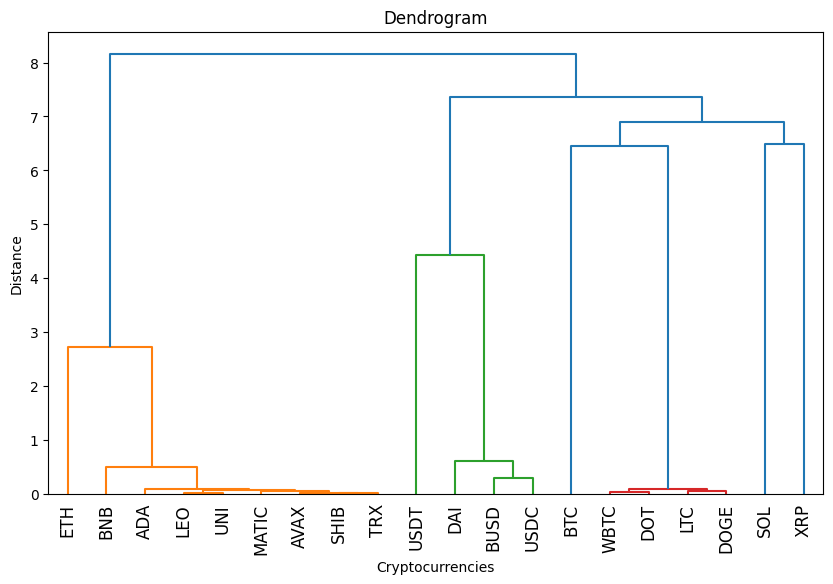

In [116]:
from scipy.cluster.hierarchy import dendrogram, linkage
from plotly.offline import iplot
import plotly.figure_factory as ff

Z = sch.linkage(features, method='ward')
plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(Z, labels=coin_names.tolist(), orientation='top')

plt.title('Dendrogram')
plt.xlabel('Cryptocurrencies')
plt.ylabel('Distance')
plt.xticks(rotation=90)
plt.show()

In [117]:
cluster_0 = coin_data[coin_data['Cluster'] == 0]
cluster_1 = coin_data[coin_data['Cluster'] == 1]

cluster_0_names = cluster_0['Symbol'].tolist()
cluster_1_names = cluster_1['Symbol'].tolist()

print("Cryptocurrencies in Cluster 0:")
print(cluster_0_names)

print("\nCryptocurrencies in Cluster 1:")
print(cluster_1_names)

Cryptocurrencies in Cluster 0:
['WBTC', 'DAI', 'LTC', 'DOT', 'SOL', 'DOGE', 'BUSD', 'XRP', 'USDC', 'USDT', 'BTC']

Cryptocurrencies in Cluster 1:
['LEO', 'UNI', 'AVAX', 'SHIB', 'TRX', 'MATIC', 'ADA', 'BNB', 'ETH']


<h2 align=left style="line-height:150%;font-family:vazir;color:#0099cc">
<font  color="#0099cc">
Cluster 0:
</font>
</h2>


Cryptocurrencies: ['WBTC', 'DAI', 'LTC', 'DOT', 'SOL', 'DOGE', 'BUSD', 'XRP', 'USDC', 'USDT', 'BTC']

Interpretation: This cluster seems to consist of cryptocurrencies with relatively lower market capitalization and volume. 

Most of these cryptocurrencies are not among the top 10 by market cap. 

They include stablecoins like 'USDT' and 'USDC,' which are known for their price stability and are often used as trading pairs.

<h2 align=left style="line-height:150%;font-family:vazir;color:#0099cc">
<font  color="#0099cc">
Cluster 1:
</font>
</h2>

Cryptocurrencies: ['LEO', 'UNI', 'AVAX', 'SHIB', 'TRX', 'MATIC', 'ADA', 'BNB', 'ETH']

Interpretation: Cluster 1 appears to contain cryptocurrencies with higher market capitalization and trading volume. 

These are some of the top cryptocurrencies in terms of market cap and are associated with well-known platforms like Ethereum ('ETH'), Cardano ('ADA'), and Binance Coin ('BNB').

Keeping the number of clusters constant at two, including the "ProofType" feature has resulted in more refined clusters. 

Separating cryptocurrencies into two clusters based on their market capitalization, volume, and ProofType. 

In the first part, the separation is primarily between a stablecoin ('USDT') and Bitcoin ('BTC').

<h2 align=left style="line-height:150%;font-family:vazir;color:#0099cc">
<font  color="#0099cc">
So what conclusions can we draw from these results ?
</font>
</h2>

In summary, the second part provides a more detailed and clear view of the cryptocurrency market, considering 'ProofType' features in clustering. 

It allows for a better understanding of the various cryptocurrencies and their groupings based on these features. 

The first part is simpler and divides cryptocurrencies into two broad categories, primarily based on 'USDT' and 'BTC.' 

The choice of which approach to use depends on the specific analysis and insights we aim to derive from the data.

In [118]:
n_clusters = 3
hc = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
coin_data['Cluster'] = hc.fit_predict(features)

c:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



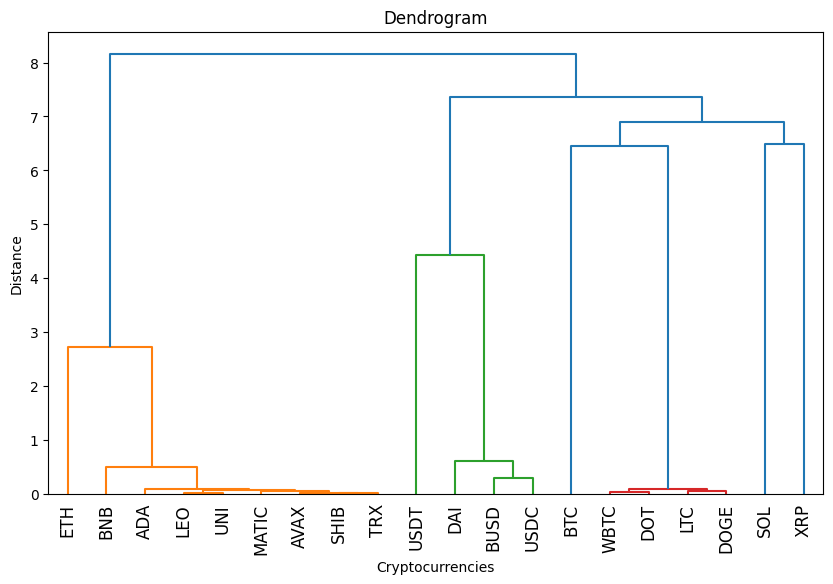

In [119]:
from scipy.cluster.hierarchy import dendrogram, linkage
from plotly.offline import iplot
import plotly.figure_factory as ff

Z = sch.linkage(features, method='ward')
plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(Z, labels=coin_names.tolist(), orientation='top')

plt.title('Dendrogram')
plt.xlabel('Cryptocurrencies')
plt.ylabel('Distance')
plt.xticks(rotation=90)
plt.show()

We can almost tell from the dendogram that the number of clusters should be 3

In [120]:
cluster_0 = coin_data[coin_data['Cluster'] == 0]
cluster_1 = coin_data[coin_data['Cluster'] == 1]
cluster_2 = coin_data[coin_data['Cluster'] == 2]

cluster_0_names = cluster_0['Symbol'].tolist()
cluster_1_names = cluster_1['Symbol'].tolist()
cluster_2_names = cluster_2['Symbol'].tolist()


print("Cryptocurrencies in Cluster 0:")
print(cluster_0_names)

print("\nCryptocurrencies in Cluster 1:")
print(cluster_1_names)

print("\nCryptocurrencies in Cluster 2:")
print(cluster_2_names)

Cryptocurrencies in Cluster 0:
['WBTC', 'LTC', 'DOT', 'SOL', 'DOGE', 'XRP', 'BTC']

Cryptocurrencies in Cluster 1:
['LEO', 'UNI', 'AVAX', 'SHIB', 'TRX', 'MATIC', 'ADA', 'BNB', 'ETH']

Cryptocurrencies in Cluster 2:
['DAI', 'BUSD', 'USDC', 'USDT']


<h2 align=left style="line-height:150%;font-family:vazir;color:#0099cc">
<font  color="#0099cc">
Cluster 0 (High Market Cap):
</font>
</h2>

Cryptocurrencies: ['WBTC', 'LTC', 'DOT', 'SOL', 'DOGE', 'XRP', 'BTC']

Interpretation: Cluster 0 consists of cryptocurrencies that have relatively high market capitalization and volume. 

These cryptocurrencies are significant players in the market and include well-known names like Bitcoin ('BTC') and Ripple ('XRP').

<h2 align=left style="line-height:150%;font-family:vazir;color:#0099cc">
<font  color="#0099cc">
Cluster 1 (High market capitalization and Trading volume): 
</font>
</h2>


Cryptocurrencies: ['LEO', 'UNI', 'AVAX', 'SHIB', 'TRX', 'MATIC', 'ADA', 'BNB', 'ETH']

Interpretation: Cluster 1 includes cryptocurrencies with high market capitalization and trading volume. 

These cryptocurrencies are among the top performers in the market, and they represent a wide range of use cases, including decentralized finance (DeFi), smart contract platforms, and meme coins.

<h2 align=left style="line-height:150%;font-family:vazir;color:#0099cc">
<font  color="#0099cc">
Cluster 2 (Stablecoins):
</font>
</h2>

Cryptocurrencies: ['DAI', 'BUSD', 'USDC', 'USDT']

Interpretation: Cluster 2 primarily consists of stablecoins. Stablecoins like 'USDT,' 'USDC,' 'DAI,' and 'BUSD' are designed to maintain a stable value and are widely used for trading and as a store of value in the cryptocurrency market.

These cryptocurrencies are associated with the 'stablecoin' Proof Type.

This three-cluster approach provides more granularity in categorizing cryptocurrencies. 

It further separates the stablecoins into their own cluster (Cluster 2), highlighting their distinct characteristics compared to other cryptocurrencies.

Clusters 0 and 1 still represent cryptocurrencies with high market capitalization and trading volume, but the division between them is more pronounced, possibly reflecting differences in the market dynamics or use cases among these cryptocurrencies.

The choice of three clusters may be useful when we want to distinguish between stablecoins and other types of cryptocurrencies, providing a more detailed analysis of the market. 

However, the specific interpretation of the clusters may vary based on the context and the goals of our analysis.

<h2 align=left style="line-height:200%;font-family:vazir;color:#0099cc">
<font  color="#0099cc">
Part 3
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در انتها یک یا چند ویژگی که فکر می‌کنید منجر به یک خوشه‌بندی بامعنا و تفسیرپذیرتر خواهد شد را نیز در نظر گرفته و آزمایش را مجدد تکرار کنید. در این بخش می‌توانید هر نوع ویژگی مرتبطی که قابل استدلال باشد را اضافه کنید (مثل ستون <code>Network</code> در مجموعه‌داده‌ی فعلی).
</font>
</p>



Adding the Network to features and encoding it:

In [121]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

coin_data = pd.get_dummies(coin_data, columns=['Network'], prefix='Network')

features = coin_data[['MarketCap', 'Volume', 'ProofType_PoH','ProofType_PoS','ProofType_PoW','ProofType_RPCA','ProofType_stablecoin'] + [col for col in coin_data.columns if col.startswith('Network_')]]

scaler = StandardScaler()
features = scaler.fit_transform(features)

Ploting the dendogram:

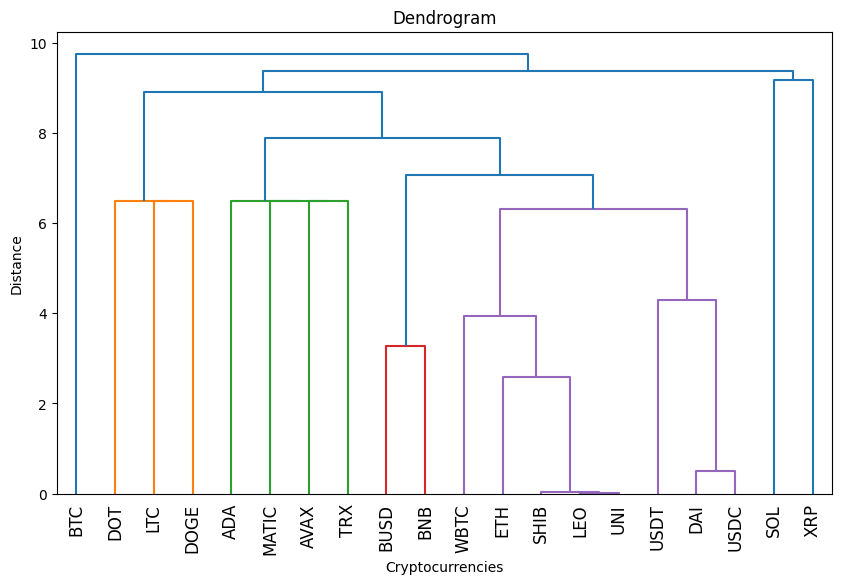

In [122]:
from scipy.cluster.hierarchy import dendrogram, linkage
from plotly.offline import iplot
import plotly.figure_factory as ff

Z = sch.linkage(features, method='ward')
plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(Z, labels=coin_names.tolist(), orientation='top')

plt.title('Dendrogram')
plt.xlabel('Cryptocurrencies')
plt.ylabel('Distance')
plt.xticks(rotation=90)
plt.show()

In [123]:
n_clusters = 2
hc = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
coin_data['Cluster'] = hc.fit_predict(features)

cluster_0 = coin_data[coin_data['Cluster'] == 0]
cluster_1 = coin_data[coin_data['Cluster'] == 1]

cluster_0_names = cluster_0['Symbol'].tolist()
cluster_1_names = cluster_1['Symbol'].tolist()

print("Cryptocurrencies in Cluster 0:")
print(cluster_0_names)

print("\nCryptocurrencies in Cluster 1:")
print(cluster_1_names)

Cryptocurrencies in Cluster 0:
['LEO', 'UNI', 'WBTC', 'AVAX', 'DAI', 'SHIB', 'LTC', 'TRX', 'DOT', 'MATIC', 'SOL', 'DOGE', 'ADA', 'BUSD', 'XRP', 'USDC', 'BNB', 'USDT', 'ETH']

Cryptocurrencies in Cluster 1:
['BTC']


c:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



<h2 align=left style="line-height:150%;font-family:vazir;color:#0099cc">
<font  color="#0099cc">
Cluster 0 :
</font>
</h2>


Cryptocurrencies: ['LEO', 'UNI', 'WBTC', 'AVAX', 'DAI', 'SHIB', 'LTC', 'TRX', 'DOT', 'MATIC', 'SOL', 'DOGE', 'ADA', 'BUSD', 'XRP', 'USDC', 'BNB', 'USDT', 'ETH']

Interpretation: Cluster 0 appears to include a wide range of cryptocurrencies with various use cases, market capitalization, and trading volume. 

This cluster is more diverse and contains cryptocurrencies representing decentralized finance (DeFi), meme coins, stablecoins, and major platforms such as Ethereum ('ETH') and Binance Coin ('BNB'). 

It seems to encompass a broad spectrum of the cryptocurrency market.

<h2 align=left style="line-height:150%;font-family:vazir;color:#0099cc">
<font  color="#0099cc">
Cluster 1 :
</font>
</h2>


Cryptocurrencies: ['BTC']

Interpretation: Cluster 1 includes only one cryptocurrency, which is Bitcoin ('BTC'). 

Bitcoin is unique in this clustering, being separate from other cryptocurrencies. 

This might indicate that Bitcoin stands out from the rest in terms of market capitalization, trading volume, and network.

The addition of the 'Network' feature further refines the clustering by taking into account the underlying blockchain networks of cryptocurrencies. 

In this particular case, Cluster 0 contains a diverse mix of cryptocurrencies, while Cluster 1 highlights the exceptional position of Bitcoin. 

This clustering provides insights into how Bitcoin differs from the rest of the cryptocurrency market due to its historical significance and distinct characteristics.

But it would be a more refined analysis if the number of clusters could be more.

As we can see from the dendogram, the model could benefit from additional clusters.